In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\Alldata.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=8)

train_x = train.drop(columns=['Surface Segregation energy', 'System'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=9, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [24]:
from sklearn.metrics import r2_score
r2_score(train_y, prediction1)

0.9701906946866637

In [25]:
from sklearn.metrics import r2_score
r2_score(test_y, prediction)

0.9100236538615063

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.15923895557259077

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.08464805942509543

In [28]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.20352779430361345


In [29]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.10844659731692363


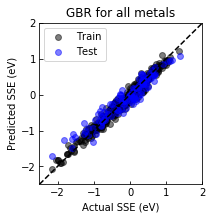

In [30]:
lineStart = test_y.min() 
lineEnd = prediction.max()  

plt.figure(figsize=(3,3))
plt.scatter(train_y, prediction1,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train')
plt.scatter(test_y,prediction,
          c = 'blue', marker = 'o', s = 35, alpha = 0.5,
          label = 'Test')

plt.title('GBR for all metals')
plt.tight_layout()
axes = plt.gca()
axes.set_xlim([-2.5,2])
axes.set_ylim([-2.5,2])

diag_line, = axes.plot(axes.get_xlim(), axes.get_ylim(), ls="--", c="black")
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")

plt.xlabel('Actual SSE (eV)')
plt.ylabel('Predicted SSE (eV)')

plt.legend(loc='upper left')
plt.savefig('GBR for all metals.png', dpi=2000)

from PIL import Image, ImageEnhance 
im = Image.open("GBR for all metals.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for all metals enhanced.png")


In [20]:
pd.set_option("max_rows", None)
df = pd.DataFrame({'Actual Surface Segregation Energy': train_y, 'Predicted Surface Segregation Energy': prediction1})
df

,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
527,-0.46,-0.504637
119,-0.01,0.078196
433,-0.02,0.041818
165,0.13,0.138027
417,-0.36,-0.289695
186,0.41,0.137990
278,0.32,0.257880
3,0.38,0.373617
151,-0.20,-0.326980
313,-1.75,-1.643935


In [21]:
pd.set_option("max_rows", None)
df = pd.DataFrame({'Actual Surface Segregation Energy': test_y, 'Predicted Surface Segregation Energy': prediction})
df


,Actual Surface Segregation Energy,Predicted Surface Segregation Energy
318,-0.45,-0.366647
480,-0.20,-0.509629
335,0.11,-0.101906
431,0.30,0.021243
333,0.44,0.305176
437,-0.82,-0.448770
239,-0.73,-0.485810
30,0.34,0.371640
524,-0.27,-0.007297
551,-2.14,-1.724330


[2.90303067e-02 1.78696997e-02 8.97033023e-03 1.62866521e-05
 2.46278663e-02 2.14903802e-02 2.26500266e-01 1.39734561e-01
 5.55988704e-02 1.93735514e-03 2.29723567e-02 3.29968967e-02
 1.46949558e-02 1.81673311e-03 4.30715919e-02 4.55379429e-02
 1.56303410e-01 1.01167453e-01 5.48816656e-02 7.81072158e-04]


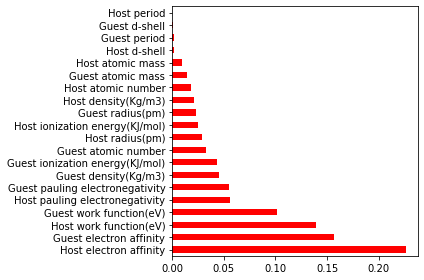

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_)
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='barh', color ="r", align="center", alpha = 1)

plt.tight_layout()
plt.savefig('das1.png', dpi=2000)

axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")


plt.savefig('FCC metals feature importance.png', dpi=2000)
plt.show()

from PIL import Image, ImageEnhance 
im = Image.open("GBR for all metals.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("GBR for all metals enhanced.png")

[0.02215549 0.02081694 0.01093392 0.00172173 0.03324871 0.02570948
 0.17294052 0.         0.19269029 0.04780203 0.00241739 0.07170884
 0.03385482 0.03479438 0.00097473 0.04039728 0.03859681 0.10599265
 0.         0.08474893 0.05746593 0.00102912]


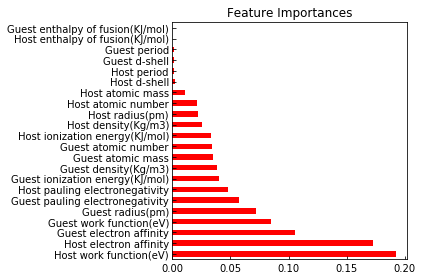

C:\Users\Damilola Ologunagba\Anaconda3\lib\site-packages\PIL\Image.py:2735: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

print(est.feature_importances_)
feat_importances = pd.Series(est.feature_importances_, index=train_x.columns)
feat_importances.nlargest(22).plot(kind='barh', color ="r", align="center", alpha = 1)


axes = plt.gca()
axes.tick_params(axis="y",direction="in")
axes.tick_params(axis="x",direction="in")
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig('All metals feature importance.png', dpi=2000)
plt.show()

from PIL import Image, ImageEnhance 
im = Image.open("All metals feature importance.png")
enhancer = ImageEnhance.Sharpness(im)
enhanced_im = enhancer.enhance(20000.0)
enhanced_im.save("All metals feature importance enhanced.png")

In [186]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.22162542015301762


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


data = pd.read_excel(r"C:\Users\Damilola Ologunagba\Desktop\MLDATA\Alldata.xlsx")
encode = LabelEncoder()
data.System = encode.fit_transform(data.System)
train , test = train_test_split(data,test_size=0.2,random_state=8)

train_x = train.drop(columns=['Surface Segregation energy', 'System', 'enthalpy of fusion/KJ/mol','enthalpy of fusion/ KJ/mol', 'period.1', 'd-shell.1', 'period', 'd-shell', 'Atomic mass', 'Atomic no', 'Radius/pm', 'density/Kg/m3', 'ionization energy /KJ/mol', 'Atomic no.1', 'Atomic mass.1', 'density/ Kg/m3', 'ionization energy /KJ/mol', 'Pauling electronegativity', 'Pauling electronegativity.1'],axis=1)
train_y = train['Surface Segregation energy']
test_x = test.drop(columns=['Surface Segregation energy', 'System', 'enthalpy of fusion/KJ/mol','enthalpy of fusion/ KJ/mol', 'period.1', 'd-shell.1', 'period', 'd-shell', 'Atomic mass', 'Atomic no', 'Radius/pm', 'density/Kg/m3', 'ionization energy /KJ/mol', 'Atomic no.1', 'Atomic mass.1', 'density/ Kg/m3', 'ionization energy /KJ/mol', 'Pauling electronegativity', 'Pauling electronegativity.1'],axis=1)
test_y = test['Surface Segregation energy']

est = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=9, loss='ls').fit(train_x, train_y)
prediction = est.predict(test_x)
prediction1 = est.predict(train_x)

In [5]:
# print result of RMSE for the test set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(test_y, prediction)))

0.4137909349652083


In [6]:
# print result of RMSE for the train set
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(train_y, prediction1)))

0.2605954823371284


In [2]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y, prediction)

0.22650167118621142

In [3]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(train_y, prediction1)

0.1364590960512782